# Intelligent Agents: Vacuum-cleaner World
Matthew Bartos

## Instructions

Total Points: 10

Complete this notebook and submit it. The notebook needs to be a complete project report with 

* your implementation,
* documentation including a short discussion of how your implementation works and your design choices, and
* experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. 

Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square is cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To starte, the agent is placed on a random square.

__Actuators:__ The agent can `clean` the current square or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [1]:
from numpy import random
import numpy as np

actions = ["north", "east", "west", "south", "suck"]


def simple_randomized_agent(bumpers, dirty):
    return random.choice(actions)

In [2]:
simple_randomized_agent({"north" : True, "east" : False, "south" : False, "west" : True}, True)

'west'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

This simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns the performance measure which is here the number of cleaned squares (since all squares are constantly dirty, it is the number of `suck` actions by the agent). 

In [24]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with 20 steps.

In [25]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: south
step 1 - action: east
step 2 - action: north
step 3 - action: east
step 4 - action: east
step 5 - action: west
step 6 - action: suck
step 7 - action: north
step 8 - action: east
step 9 - action: suck
step 10 - action: east
step 11 - action: north
step 12 - action: north
step 13 - action: west
step 14 - action: suck
step 15 - action: south
step 16 - action: south
step 17 - action: suck
step 18 - action: south
step 19 - action: west


4

# Tasks

_Submission Instructions:_ Use this notebook to prepare your submission. Complete this section with your code and results. You can add additional Markdown blocks for your description, comments in the code and use mathplotlib to produce charts. 

_Note:_ Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design. 


## Task 1: Implement a simulation environment [2 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty.
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment needs to work with the simple randomized agent program from above and then it can be used for your agent implementation in the tasks below.

In [5]:
#Create the environment
n = 5 #size
myMap = np.ones((n,n), dtype = int) #map of size n
for i in range(n):
    myMap[random.randint(0, 5), random.randint(0, 5)] = 0
    
myMap

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1]])

In [6]:
#globally define the bumpers
bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

def simulation_environment(agent, max_steps, verbose = False):
    # Performance: keep track of energy units. Each energy movement costs 1:
    PerformanceMeasure = 0
    # Keep track of the agent's position:
    xPos = 0 # moving north is -1, moving south is +1
    yPos = 0 # moving east is +1, moving west is -1
    num_cleaned = 0
    
    #Iterate through the map
    for i in range(max_steps):
        dirty = False 
        if myMap[xPos, yPos] == 0:
            dirty = True
            

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        #react to the agents actions
        
        if (action == "suck"):
            myMap[xPos, yPos] = 1 #the 
            num_cleaned = num_cleaned + 1
        #if direction equals north
        if (action == "north"):
            xPos = xPos - 1
            if xPos < 0: 
                xPos = 0
        #if direction equals south
        if (action == "south"):
            xPos = xPos + 1
            if xPos == (n-1):
                bumpers["south"] = True
            if xPos > (n-1): #if wall
                xPos = (n-1)
         #if direction equals east       
        if (action == "east"):
            yPos = yPos + 1
            if yPos > (n-1): 
                yPos = (n-1)
        #if direction equals west
        if (action == "west"):
            yPos = yPos - 1
            if yPos < 0: #if wall
                yPos = 0
                
        
        #update bumpers:
        if xPos == 0:
            bumpers["north"] = True
        else:
            bumpers["north"] = False
        if xPos == (n-1):
            bumpers["south"] = True
        else:
            bumpers["south"] = False
        if yPos == 0: 
            bumpers["west"] = True
        else:
            bumpers["west"] = False
        if yPos == (n-1):
            bumpers["east"] = True
        else:
            bumpers["east"] = False
            
        #update performance measures
        PerformanceMeasure = PerformanceMeasure + 1
        #add stopping mechanism to fix performance measure
        roomClean = True
        for x in myMap:
            for i in x:
                if i == 0:
                    roomClean = False

        if roomClean:
            print('Performance Measure:', PerformanceMeasure)    
            print('Number Cleaned:', num_cleaned)
            return PerformanceMeasure
        
        #End iteration
        

    print('Performance Measure:', PerformanceMeasure)    
    print('Number Cleaned:', num_cleaned)
    return PerformanceMeasure

In [7]:
#Run the simulation environment:
PerformanceMeasure = simulation_environment(simple_randomized_agent, max_steps = 100000)

Performance Measure: 475
Number Cleaned: 100


In [8]:
myMap #map is fully clean (all 1's)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

## Task 2:  Implement a simple reflex agent [1 Point] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking.

In [9]:
#simple reflex agent function:

def simple_reflex_agent(bumpers, dirty):
    #Agent responds to dirty by sucking it up
    if dirty:
        return "suck"
    #agent responds to north wall
    if bumpers["north"] == True:
        newActions = ["east", "west", "south"]
        if bumpers["east"] == True or bumpers["west"] == True:
            return "south"
        return random.choice(newActions)
    #agent responds to a south wall
    if bumpers["south"] == True:
        newActions = ["east", "west", "north"]
        if bumpers["east"] == True or bumpers["west"] == True:
            return "north"
        return random.choice(newActions)
    #agent responds to an east wall
    if bumpers["east"] == True:
        newActions = ["north", "west", "east"]
        if bumpers["north"] == True or bumpers["south"] == True:
            return "west"
        return random.choice(newActions)
    #agent responds to a west wall
    if bumpers["west"] == True:
        newActions = ["north", "south", "east"]
        if bumpers["north"] == True or bumpers["south"] == True:
            return "west"
        return random.choice(newActions)
    #move in a random direction, don't suck
    newActions = ["east", "west", "north", "south"]
    return random.choice(newActions)

In [10]:
# Testing the simple_reflex_agent:

#reintilize the map:
n = 5 #size
myMap = np.ones((n,n), dtype = int) #map of size n
for i in range(n):
    myMap[random.randint(0, 5), random.randint(0, 5)] = 0
    
myMap

PerformanceMeasure = simulation_environment(simple_reflex_agent, max_steps = 100000)

Performance Measure: 251
Number Cleaned: 4


In [11]:
myMap

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

## Task 3: Implement a model-based reflex agent [3 Point]

This agent keeps track of the location and remembers where it has cleaned. Assume the agent knows how many squares the room has. It can move to a corner to determin its location and then is able to use more advanced navigation.

_Note on implementing the state:_ You can use a global variable. In Python, you have to use the keyword `global` in your function for this to work (see: https://www.programiz.com/python-programming/global-keyword). Alternatively, you can define a class for your agent with a member variable for the state and a function for the agent program (see: https://www.w3schools.com/python/python_classes.asp). 

Describe how you define the __agent state__ and how your agent works before implementing it.

<hr>
A Model-based reflex agent maintains an internal state which keeps track of aspects that cannot currently be observed in the environment. This record is then referenced to help the agent make decisions based on the state of the environment. An example of a model-based reflex agent would be the vacuum cleaner remembering where it has cleaned previously. 

Therefore, an <b>Agent State</b> must be implemented; the Agent State tracks/updates the environment’s current state. In this case, the agent state will keep track of visited/cleaned locations. For this Agent State implementation, a <i>global list of pairs</i> will track all locations visited. A set is particularly useful because it will allow no duplicate elements, meaning it provides additional checking to make sure no location is visited multiple times. The overall agent state’s purpose is to track where the vacuum is visited.

In terms of the vacuum movement, the vacuum will move horizontally in one direction until a bumper gets triggered. Next, the bumper will move north or south, and then continue to move horizontally in the other direction until a bumper gets triggered. Moving in this pattern will produce an optimal grid like movement of the vacuum. 
<hr>

In [12]:
# Your code goes here
visitedSpaces =  [ (0,0) ] #remeber where it has cleaned

def modelBased_reflex_agent(bumpers, dirty, verbose = True):    
    #if current space is dirty, suck it up
    if dirty:
        return "suck"
    #if first movement, move East initially
    if len(visitedSpaces) == 1:
        myPair = (0,1)
        visitedSpaces.append(myPair)
        return "east"
    #if east or west bumpers is activated, and current postion has not been visited, move south  
    if (bumpers["east"] == True or bumpers["west"] == True):
        currPos = visitedSpaces[len(visitedSpaces)  - 1]
        if bumpers["east"] == True: 
            testPosition = (currPos[0], currPos[1] - 1)
            if testPosition in visitedSpaces:
                finalPos = (currPos[0] + 1, currPos[1])
                visitedSpaces.append(finalPos)
                return "south"
            else:
                finalPos = (currPos[0], currPos[1] - 1)
                visitedSpaces.append(finalPos)
                return "west"
        if bumpers["west"] == True:
            testPosition = (currPos[0], currPos[1] + 1)
            if testPosition in visitedSpaces:
                finalPos = (currPos[0] + 1, currPos[1])
                visitedSpaces.append(finalPos)
                return "south"
            else:
                finalPos = (currPos[0], currPos[1] + 1)
                visitedSpaces.append(finalPos)
                return "east"
         
        
    currPos = visitedSpaces[len(visitedSpaces)  - 1]
    prevPos = visitedSpaces[len(visitedSpaces)  - 2]
    #if current xPos is greater than last x Pos, continue to move East
    if currPos[1] > prevPos[1]:
        finalPos = (currPos[0], currPos[1] + 1)
        visitedSpaces.append(finalPos)
        return "east"
    else:
        #move west 
        finalPos = (currPos[0], currPos[1] - 1)
        visitedSpaces.append(finalPos)
        return "west"
        
    newPos = (currPos[0] + 1, currPos[1])
    visitedSpaces.append(newPos)
    return "south"

In [13]:
#reintilze the map
n = 5 #size
myMap = np.ones((n,n), dtype = int) #map of size n
for i in range(n):
    myMap[random.randint(0, 5), random.randint(0, 5)] = 0
    
myMap
#Test the model based agent
PerformanceMeasure = simulation_environment(modelBased_reflex_agent, max_steps = 100000)

Performance Measure: 28
Number Cleaned: 4


In [14]:
myMap

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

## Task 4: Simulation study [3 Points]

Compare the performance of the agents using different size environments. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use at least 100 random runs for each. Present the results in a suitable format (tables, graphs) and discuss the differences.

<h4> Simple Randomized agent trials and analysis:

In [15]:
#100 trials for a simple_randomized_agent:
myMap = np.ones((n,n), dtype = int) #map of size n
randomizedAgent_result_five = []
randomizedAgent_result_ten = []
randomizedAgent_result_hundred = []


for i in range(50):
    myMap = np.ones((n,n), dtype = int)
    n = 5 #size
    for i in range(n):
        myMap[random.randint(0, 5), random.randint(0, 5)] = 0
    PerformanceMeasure = simulation_environment(simple_randomized_agent, max_steps = 2000)
    randomizedAgent_result_five.append(PerformanceMeasure)
    
for i in range(50):
    n = 10 #size
    myMap = np.ones((n,n), dtype = int)
    for i in range(n):
        myMap[random.randint(0, n), random.randint(0, n)] = 0
    PerformanceMeasure = simulation_environment(simple_randomized_agent, max_steps = 10000)
    randomizedAgent_result_ten.append(PerformanceMeasure)
    
for i in range(5):
    n = 100 #size
    myMap = np.ones((n,n), dtype = int)
    for i in range(n):
        myMap[random.randint(0, n), random.randint(0, n)] = 0
    PerformanceMeasure = simulation_environment(simple_randomized_agent, max_steps = 30000)
    randomizedAgent_result_hundred.append(PerformanceMeasure)
    


Performance Measure: 277
Number Cleaned: 59
Performance Measure: 557
Number Cleaned: 106
Performance Measure: 253
Number Cleaned: 54
Performance Measure: 366
Number Cleaned: 75
Performance Measure: 274
Number Cleaned: 46
Performance Measure: 617
Number Cleaned: 139
Performance Measure: 328
Number Cleaned: 62
Performance Measure: 528
Number Cleaned: 96
Performance Measure: 999
Number Cleaned: 188
Performance Measure: 265
Number Cleaned: 59
Performance Measure: 196
Number Cleaned: 43
Performance Measure: 272
Number Cleaned: 56
Performance Measure: 280
Number Cleaned: 51
Performance Measure: 664
Number Cleaned: 143
Performance Measure: 823
Number Cleaned: 148
Performance Measure: 435
Number Cleaned: 99
Performance Measure: 350
Number Cleaned: 73
Performance Measure: 343
Number Cleaned: 74
Performance Measure: 279
Number Cleaned: 59
Performance Measure: 125
Number Cleaned: 25
Performance Measure: 1078
Number Cleaned: 219
Performance Measure: 558
Number Cleaned: 109
Performance Measure: 218

<AxesSubplot:title={'center':'random Agent performance measure 100x100'}>

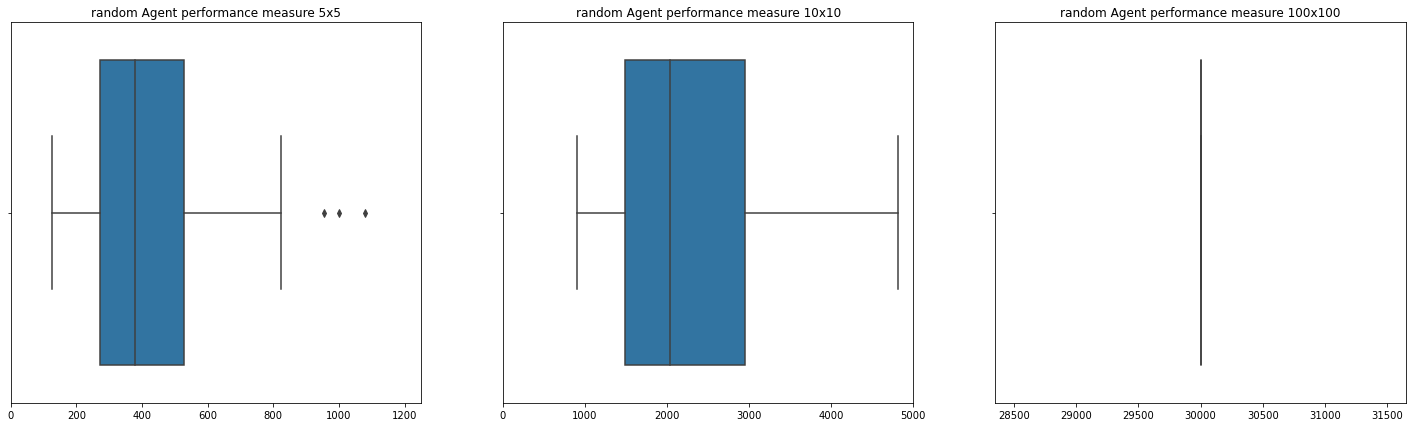

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(25, 7))
                
plt.subplot(1,3,1)
plt.title("random Agent performance measure 5x5")
sns.boxplot(randomizedAgent_result_five)
plt.xlim(0, 1250)

plt.subplot(1,3,2)
plt.title("random Agent performance measure 10x10")
sns.boxplot(randomizedAgent_result_ten)
plt.xlim(0, 5000)

plt.subplot(1,3,3)
plt.title("random Agent performance measure 100x100")
sns.boxplot(randomizedAgent_result_hundred)

In [26]:
printStats = True
if printStats:
    #
    Mymin = np.amin(randomizedAgent_result_five) 
    Mymax = np.amax(randomizedAgent_result_five) 
    Myrange = np.ptp(randomizedAgent_result_five) 
    Myvarience = np.var(randomizedAgent_result_five) 
    mysd = np.std(randomizedAgent_result_five) 

    print("------------------------------------") 
    print("random Agent performance measure 5x5:") 
    print("Minimum =", Mymin) 
    print("Maximum =", Mymax) 
    print("Range =", Myrange) 
    print("Varience =", Myvarience) 
    print("Standard Deviation =", mysd) 

    Mymin = np.amin(randomizedAgent_result_ten) 
    Mymax = np.amax(randomizedAgent_result_ten) 
    Myrange = np.ptp(randomizedAgent_result_ten) 
    Myvarience = np.var(randomizedAgent_result_ten) 
    mysd = np.std(randomizedAgent_result_ten) 

    print("------------------------------------") 
    print("random Agent performance measure 10x10:") 
    print("Minimum =", Mymin) 
    print("Maximum =", Mymax) 
    print("Range =", Myrange) 
    print("Varience =", Myvarience) 
    print("Standard Deviation =", mysd)  

    Mymin = np.amin(randomizedAgent_result_hundred) 
    Mymax = np.amax(randomizedAgent_result_hundred) 
    Myrange = np.ptp(randomizedAgent_result_hundred) 
    Myvarience = np.var(randomizedAgent_result_hundred) 
    mysd = np.std(randomizedAgent_result_hundred) 

    print("------------------------------------") 
    print("random Agent performance measure 100x100:") 
    print("Minimum =", Mymin) 
    print("Maximum =", Mymax) 
    print("Range =", Myrange) 
    print("Varience =", Myvarience) 
    print("Standard Deviation =", mysd) 

------------------------------------
random Agent performance measure 5x5:
Minimum = 125
Maximum = 1262
Range = 1137
Varience = 60551.62760000001
Standard Deviation = 246.0724031662226
------------------------------------
random Agent performance measure 10x10:
Minimum = 904
Maximum = 6391
Range = 5487
Varience = 1817852.5699999996
Standard Deviation = 1348.277630905445
------------------------------------
random Agent performance measure 100x100:
Minimum = 30000
Maximum = 30000
Range = 0
Varience = 0.0
Standard Deviation = 0.0


The Simple Randomized agent results serve as a baseline for comparison for the more advanced agents. The Simple Randomized agent does not behave rationally, instead it randomly chooses to move in one direction or suck up the dirt. This means the range of the results/performance measure varies greatly because the outcome is dependent on chance. 
<br><br>
For smaller rooms such as 5x5, the simple randomized agent performs reasonably considering the agent is guided by random chance. However, the worst-case scenarios for cleaning the room are very large because there might be a square that takes an agent awhile for cleaning up. Therefore, the variance, standard deviation, and range are all very high for this 5x5 board. These same discrepancies can be applied to the 10x10 board for this agent. The range, standard deviation, and variance are all even larger due to being dependent on random chance. 
<br><br>
When dealing with larger rooms such as 100x100, it is almost infeasible for the Simple Randomized agent to clean the entire room. The reason for this being, with random chance it could take an extremely long time for the robot to randomly clean every single square on the grid. The performance measure was always equal to the number of max-steps, which is why the third box-plot is just a line. Only a few trails were run with the large room due to these discrepancies and long run time. 



<br><hr> <h4> Simple Reflexive agent trials and analysis:

In [18]:
#100 trials for a simple_reflex_agent:
myMap = np.ones((n,n), dtype = int) #map of size n
simpleReflex_result_five = []
simpleReflex_result_ten = []
simpleReflex_result_hundred = []

j = 0
for j in range(0, 100):
    myMap = np.ones((n,n), dtype = int)
    n = 5 #size
    for i in range(n):
        myMap[random.randint(0, 5), random.randint(0, 5)] = 0
    PerformanceMeasure = simulation_environment(simple_reflex_agent, max_steps = 2000)
    simpleReflex_result_five.append(PerformanceMeasure)
    
for i in range(0,100):
    n = 10 #size
    myMap = np.ones((n,n), dtype = int)
    for i in range(n):
        myMap[random.randint(0, n), random.randint(0, n)] = 0
    PerformanceMeasure = simulation_environment(simple_reflex_agent, max_steps = 10000)
    simpleReflex_result_ten.append(PerformanceMeasure)
    
for i in range(0,3):
    n = 100 #size
    myMap = np.ones((n,n), dtype = int)
    for i in range(n):
        myMap[random.randint(0, n), random.randint(0, n)] = 0
    PerformanceMeasure = simulation_environment(simple_reflex_agent, max_steps = 30000)
    simpleReflex_result_hundred.append(PerformanceMeasure)
    


Performance Measure: 144
Number Cleaned: 5
Performance Measure: 126
Number Cleaned: 4
Performance Measure: 62
Number Cleaned: 5
Performance Measure: 176
Number Cleaned: 5
Performance Measure: 224
Number Cleaned: 5
Performance Measure: 60
Number Cleaned: 5
Performance Measure: 57
Number Cleaned: 4
Performance Measure: 56
Number Cleaned: 5
Performance Measure: 161
Number Cleaned: 3
Performance Measure: 97
Number Cleaned: 5
Performance Measure: 142
Number Cleaned: 5
Performance Measure: 334
Number Cleaned: 5
Performance Measure: 215
Number Cleaned: 5
Performance Measure: 85
Number Cleaned: 5
Performance Measure: 101
Number Cleaned: 5
Performance Measure: 157
Number Cleaned: 5
Performance Measure: 22
Number Cleaned: 3
Performance Measure: 72
Number Cleaned: 4
Performance Measure: 152
Number Cleaned: 4
Performance Measure: 93
Number Cleaned: 5
Performance Measure: 141
Number Cleaned: 4
Performance Measure: 81
Number Cleaned: 4
Performance Measure: 132
Number Cleaned: 5
Performance Measure: 

Performance Measure: 457
Number Cleaned: 9
Performance Measure: 724
Number Cleaned: 8
Performance Measure: 2328
Number Cleaned: 9
Performance Measure: 814
Number Cleaned: 10
Performance Measure: 379
Number Cleaned: 10
Performance Measure: 953
Number Cleaned: 9
Performance Measure: 30000
Number Cleaned: 54
Performance Measure: 30000
Number Cleaned: 63
Performance Measure: 30000
Number Cleaned: 43


<AxesSubplot:title={'center':'random Agent performance measure 100x100'}>

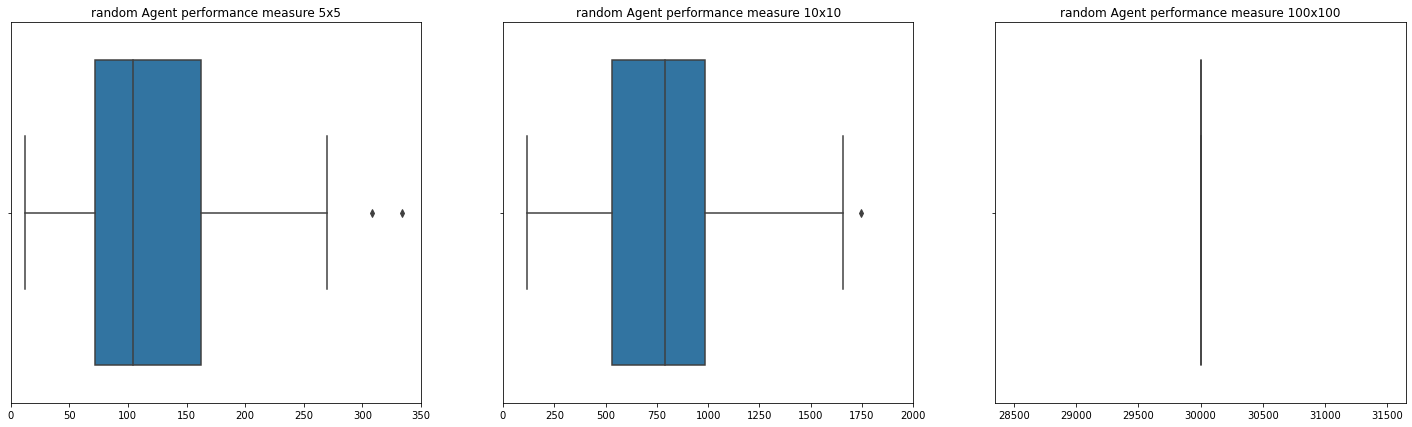

In [27]:
#plot the results:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(25, 7))
                
plt.subplot(1,3,1)
plt.title("random Agent performance measure 5x5")
sns.boxplot(simpleReflex_result_five)
plt.xlim(0, 350)

plt.subplot(1,3,2)
plt.title("random Agent performance measure 10x10")
sns.boxplot(simpleReflex_result_ten)
plt.xlim(0, 2000)

plt.subplot(1,3,3)
plt.title("random Agent performance measure 100x100")
sns.boxplot(simpleReflex_result_hundred)

In [28]:
printStats = True
if printStats:
    #simpleReflex_result_five stats
    Mymin = np.amin(simpleReflex_result_five) 
    Mymax = np.amax(simpleReflex_result_five) 
    Myrange = np.ptp(simpleReflex_result_five) 
    Myvarience = np.var(simpleReflex_result_five) 
    mysd = np.std(simpleReflex_result_five) 

    print("------------------------------------") 
    print("random Agent performance measure 5x5:") 
    print("Minimum =", Mymin) 
    print("Maximum =", Mymax) 
    print("Range =", Myrange) 
    print("Varience =", Myvarience) 
    print("Standard Deviation =", mysd) 

    ##simpleReflex_result_ten stats
    Mymin = np.amin(simpleReflex_result_ten) 
    Mymax = np.amax(simpleReflex_result_ten) 
    Myrange = np.ptp(simpleReflex_result_ten) 
    Myvarience = np.var(simpleReflex_result_ten) 
    mysd = np.std(simpleReflex_result_ten) 

    print("------------------------------------") 
    print("random Agent performance measure 10x10:") 
    print("Minimum =", Mymin) 
    print("Maximum =", Mymax) 
    print("Range =", Myrange) 
    print("Varience =", Myvarience) 
    print("Standard Deviation =", mysd)  

    Mymin = np.amin(simpleReflex_result_hundred) 
    Mymax = np.amax(simpleReflex_result_hundred) 
    Myrange = np.ptp(simpleReflex_result_hundred) 
    Myvarience = np.var(simpleReflex_result_hundred) 
    mysd = np.std(simpleReflex_result_hundred) 

    print("------------------------------------") 
    print("random Agent performance measure 100x100:") 
    print("Minimum =", Mymin) 
    print("Maximum =", Mymax) 
    print("Range =", Myrange) 
    print("Varience =", Myvarience) 
    print("Standard Deviation =", mysd) 

------------------------------------
random Agent performance measure 5x5:
Minimum = 12
Maximum = 1009
Range = 997
Varience = 18044.717099999998
Standard Deviation = 134.33062606866685
------------------------------------
random Agent performance measure 10x10:
Minimum = 117
Maximum = 2690
Range = 2573
Varience = 231148.53240000003
Standard Deviation = 480.7790889795437
------------------------------------
random Agent performance measure 100x100:
Minimum = 30000
Maximum = 30000
Range = 0
Varience = 0.0
Standard Deviation = 0.0


The simple reflexive agent does not maintain an internal state of the environment but simply reacts to its sensors: cleaning when commanded by the dirty sensor, not moving in direction of an active sensor, etc. Therefore, we can expect an increase in performance across the board- specifically with the smaller room sizes.
<br><br>
Like the simple random agent, the simple reflexive agent had large range, standard deviation, and variance for both the 5x5 and 10x10 room sizes. However, the performance measure for the simple reflexive agent for both the 5x5 and 10x10 room sizes is much better. The performance measure median for the simple random agent is 400 versus 100 for the simple reflexive agent (5x5 room size). For the 10x10 room size, the median performance measure was ~750 for the simple reflexive agent versus ~2000 for the simple random agent. Just using the sensors greatly improves the performance of the agent. 
<br><br>
However, when examining the larger room sizes (100x100), the agent still failed to clean the room. Like before, The performance measure was always equal to the number of max-steps, which is why the third box-plot is just a line. The agent needs a way to maintain an internal state and keep track of where it has been, it is very hard to clean a large room with a random navigation system. Only a few trails were run with the large room due to these discrepancies and long run time. 


<hr> <br> <h4> Model-based reflex agent trials and analysis:

In [22]:
#100 trials for a modelBased_reflexice_agent:
n=5
myMap = np.ones((n,n), dtype = int) #map of size n
modelBased_result_five = []
modelBased_result_ten = []
modelBased_result_hundred = []


for i in range(50):
    myMap = np.ones((n,n), dtype = int)
    n = 5 #size
    for i in range(n):
        myMap[random.randint(0, 5), random.randint(0, 5)] = 0
    PerformanceMeasure = simulation_environment(modelBased_reflex_agent, max_steps = 500)
    modelBased_result_five.append(PerformanceMeasure)
    
for i in range(50):
    n = 10 #size
    myMap = np.ones((n,n), dtype = int)
    for i in range(n):
        myMap[random.randint(0, n), random.randint(0, n)] = 0
    PerformanceMeasure = simulation_environment(modelBased_reflex_agent, max_steps = 1000)
    modelBased_result_ten.append(PerformanceMeasure)
    
for i in range(10):
    n = 100 #size
    myMap = np.ones((n,n), dtype = int)
    for i in range(n):
        myMap[random.randint(0, n), random.randint(0, n)] = 0
    PerformanceMeasure = simulation_environment(modelBased_reflex_agent, max_steps = 15000)
    modelBased_result_hundred.append(PerformanceMeasure)
    

Performance Measure: 26
Number Cleaned: 5
Performance Measure: 21
Number Cleaned: 4
Performance Measure: 500
Number Cleaned: 3
Performance Measure: 26
Number Cleaned: 5
Performance Measure: 29
Number Cleaned: 5
Performance Measure: 500
Number Cleaned: 3
Performance Measure: 18
Number Cleaned: 4
Performance Measure: 23
Number Cleaned: 3
Performance Measure: 28
Number Cleaned: 5
Performance Measure: 27
Number Cleaned: 5
Performance Measure: 29
Number Cleaned: 5
Performance Measure: 23
Number Cleaned: 4
Performance Measure: 17
Number Cleaned: 4
Performance Measure: 19
Number Cleaned: 5
Performance Measure: 24
Number Cleaned: 4
Performance Measure: 500
Number Cleaned: 3
Performance Measure: 500
Number Cleaned: 4
Performance Measure: 500
Number Cleaned: 3
Performance Measure: 22
Number Cleaned: 5
Performance Measure: 19
Number Cleaned: 4
Performance Measure: 19
Number Cleaned: 5
Performance Measure: 500
Number Cleaned: 3
Performance Measure: 500
Number Cleaned: 4
Performance Measure: 27
Num

<AxesSubplot:title={'center':'model based performance measure 100x100'}>

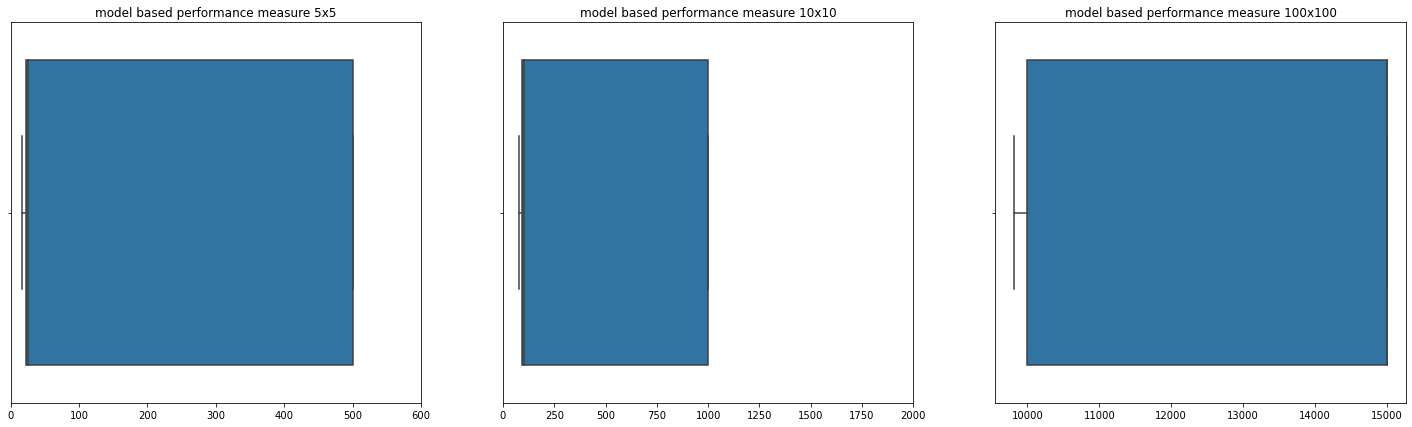

In [32]:
#plot the results:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(25, 7))
                
plt.subplot(1,3,1)
plt.title("model based performance measure 5x5")
sns.boxplot(modelBased_result_five)
plt.xlim(0, 600)

plt.subplot(1,3,2)
plt.title("model based performance measure 10x10")
sns.boxplot(modelBased_result_ten)
plt.xlim(0, 2000)

plt.subplot(1,3,3)
plt.title("model based performance measure 100x100")
sns.boxplot(modelBased_result_hundred)


In [33]:
printStats = True
if printStats:
    #simpleReflex_result_five stats
    Mymin = np.amin(modelBased_result_five) 
    Mymax = np.amax(modelBased_result_five) 
    Myrange = np.ptp(modelBased_result_five) 
    Myvarience = np.var(modelBased_result_five) 
    mysd = np.std(modelBased_result_five) 

    print("------------------------------------") 
    print("random Agent performance measure 5x5:") 
    print("Minimum =", Mymin) 
    print("Maximum =", Mymax) 
    print("Range =", Myrange) 
    print("Varience =", Myvarience) 
    print("Standard Deviation =", mysd) 

    ##simpleReflex_result_ten stats
    Mymin = np.amin(modelBased_result_ten) 
    Mymax = np.amax(modelBased_result_ten) 
    Myrange = np.ptp(modelBased_result_ten) 
    Myvarience = np.var(modelBased_result_ten) 
    mysd = np.std(modelBased_result_ten) 

    print("------------------------------------") 
    print("random Agent performance measure 10x10:") 
    print("Minimum =", Mymin) 
    print("Maximum =", Mymax) 
    print("Range =", Myrange) 
    print("Varience =", Myvarience) 
    print("Standard Deviation =", mysd)  

    Mymin = np.amin(modelBased_result_hundred) 
    Mymax = np.amax(modelBased_result_hundred) 
    Myrange = np.ptp(modelBased_result_hundred) 
    Myvarience = np.var(modelBased_result_hundred) 
    mysd = np.std(modelBased_result_hundred) 

    print("------------------------------------") 
    print("random Agent performance measure 100x100:") 
    print("Minimum =", Mymin) 
    print("Maximum =", Mymax) 
    print("Range =", Myrange) 
    print("Varience =", Myvarience) 
    print("Standard Deviation =", mysd) 

------------------------------------
random Agent performance measure 5x5:
Minimum = 16
Maximum = 500
Range = 484
Varience = 47766.8276
Standard Deviation = 218.5562344111922
------------------------------------
random Agent performance measure 10x10:
Minimum = 79
Maximum = 1000
Range = 921
Varience = 188992.2836
Standard Deviation = 434.7324275919614
------------------------------------
random Agent performance measure 100x100:
Minimum = 9814
Maximum = 15000
Range = 5186
Varience = 6138024.4399999995
Standard Deviation = 2477.5036710366344


The model-based agent maintains an internal state and keeps track of locations where it has been. These qualities allow for an optimized and rational performance of the agent. There were some discrepancies/outliers where the agent would get stuck in a corner and require the max_steps to stop the iteration.
<br> <br>
Excluding these outliers, in the 5x5 room, the performance measure was always very similar and optimal (common values include 18, 17, 19, 24). The difference in these common values is due to the random locations of the initial dirt. The same near optimal performance measures can be seen in the 10x10 room distribution and boxplot. 
<br> <br>
When looking at the 100x100 room, we can see the benefits of the model-based agent versus the simple reflexive agent and random agent. Where the other agents would have taken forever, the model-based agent is able to clean the 100x100 room with a performance measure of approximately 10,000. The internal state and systematic navigation allows the model-based agent to perform well. Since the trials take a very long time, the normal 100 trials were shortened. 
<hr>

## Task 5: Robustness of the agent implementations [1 Point] 

Describe how your agent implementations will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

<hr> <br>
1) In my model based-reflexive agent, a rectangular room of unknown size will not affect the agent’s rationality and it will still behave optimally. My model based-reflexive agent has not context of the environment size/shape. Instead, it iterates horizontally and cleans from left to right, and left to right once reaching the other side. To accomplish this the bump sensors and a list of visited spaces are used. Meaning, the size of the rectangular room does not matter and the model-based reflexive agent will stay behave properly/optimally for this environment. 
<br> <br>
2) If the cleaning area was an irregular shape, the irregular shape would have a great impact on the performance of my model-based agent. My model-based agent keeps track of what spaces are visited and will not move back to a space it has already traversed. This feature could cause the agent/vacuum to get infinitely stuck and not be able to clean the entire room For example, consider an environment with an irregular corner with a 1x1 opening. If the agent/vacuum went into this corner it would not be able to get out because it had already visited the spot to get in. Overall, the irregular shape could cause the model-based agent to infinitely loop forever and not be able to properly clean the room. <br> <br>

3) Like the irregular shape, the obstacles could cause the model-based agent to get stuck, become unusable, and unable to clean the room. Since my agent iterates horizontally from right to left and left to right, if it hit a wall it would start to iterate back the other way. When it traveled back past the wall there is a chance it would miss some dirty spaces. For example, If the environment had a barrier wall protruding into the room, the agent would clean till it hit the wall and then move down. However, when the agent came back past the wall, it would have no way to check the other side of the wall, since it only moves left right and down. Overall a protruding wall or an obstacle could cause the model-based agent to not perform fully/properly. 


## Bonus tasks [+1 Point]

Change your simulation environment tor run experiments for the following problems:

* __Obstacles:__ Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.
* __Unknown environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square.
* __Utility-based agent:__ Change the environment, so each square has a fixed probability of getting dirty again. We assume the agent has learned this information over time. For the implementation, we give this information to the agent as a 2-dimensional array of probabilities  Cleaning one dirty square produces a utility of 1. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 10000 time steps. This is very tricky!

In [ ]:
# Your code and discussion goes here